In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('temp2/temp_6.csv')

In [3]:
df['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df['v_x']]
df.pH = [value if value < 15 else value / 10 for value in df.pH.values]
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
       'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions', 'v_pos'],
      dtype='object')


datetime      y       x       v_x       v_y     v_len  \
0       2024-04-10 13:38:23  9.645   0.155       NaN       NaN       NaN   
1       2024-04-10 13:38:23  9.645   0.285       NaN       NaN       NaN   
2       2024-04-10 13:38:23  9.645   0.415       NaN       NaN       NaN   
3       2024-04-10 13:38:23  9.645   0.545       NaN       NaN       NaN   
4       2024-04-10 13:38:23  9.645   0.675       NaN       NaN       NaN   
...                     ...    ...     ...       ...       ...       ...   
9299131 2024-01-05 13:41:17  0.155  19.525  0.001230  0.010328  0.010401   
9299132 2024-01-05 13:41:17  0.155  19.655 -0.006016  0.008699  0.010577   
9299133 2024-01-05 13:41:17  0.155  19.785  0.007823 -0.004113  0.008838   
9299134 2024-01-05 13:41:17  0.155  19.915 -0.057642 -0.049512  0.075987   
9299135 2024-01-05 13:41:17  0.155  20.045  0.013790  0.029355  0.032433   

             s2n     corr  sun_altitude  sun_azimuth  ...    pH  vegetation  \
0        0.00000  0.00000      0.928858     3.662460  ...  8.73        none   
1        0.00000  0.00000      0.928858     3.662460  ...  8.73        none   
2        0.00000  0.00000      0.928858     3.662460  ...  8.73        none   
3        0.00000  0.00000      0.928858     3.662460  ...  8.73        none   
4        0.00000  0.00000      0.928858     3.662460  ...  8.73        none   
...          ...      ...           ...          ...  ...   ...         ...   
9299131  3.14992  0.48536      0.414650     3.444309  ...  8.38        none   
9299132  3.29048  0.50888      0.414650     3.444309  ...  8.38        none   
9299133  3.18176  0.50664      0.414650     3.444309  ...  8.38        none   
9299134  3.10912  0.49288      0.414650     3.444309  ...  8.38        none   
9299135  2.94160  0.48568      0.414650     3.444309  ...  8.38        none   

        windspeed  winddir  visibility  cloudcover  solarradiation  uvindex  \
0             3.5      349         9.9         0.0             942        9   
1             3.5      349         9.9         0.0             942        9   
2             3.5      349         9.9         0.0             942        9   
3             3.5      349         9.9         0.0             942        9   
4             3.5      349         9.9         0.0             942        9   
...           ...      ...         ...         ...             ...      ...   
9299131       5.8       57         1.2       100.0             133        1   
9299132       5.8       57         1.2       100.0             133        1   
9299133       5.8       57         1.2       100.0             133        1   
9299134       5.8       57         1.2       100.0             133        1   
9299135       5.8       57         1.2       100.0             133        1   

                   conditions  v_pos  
0                       Clear      0  
1                       Clear      0  
2                       Clear      0  
3                       Clear      0  
4                       Clear      0  
...                       ...    ...  
9299131  Snow, Rain, Overcast      1  
9299132  Snow, Rain, Overcast     -1  
9299133  Snow, Rain, Overcast      1  
9299134  Snow, Rain, Overcast     -1  
9299135  Snow, Rain, Overcast      1  

[9299136 rows x 27 columns]

<Axes: xlabel='conditions', ylabel='Count'>

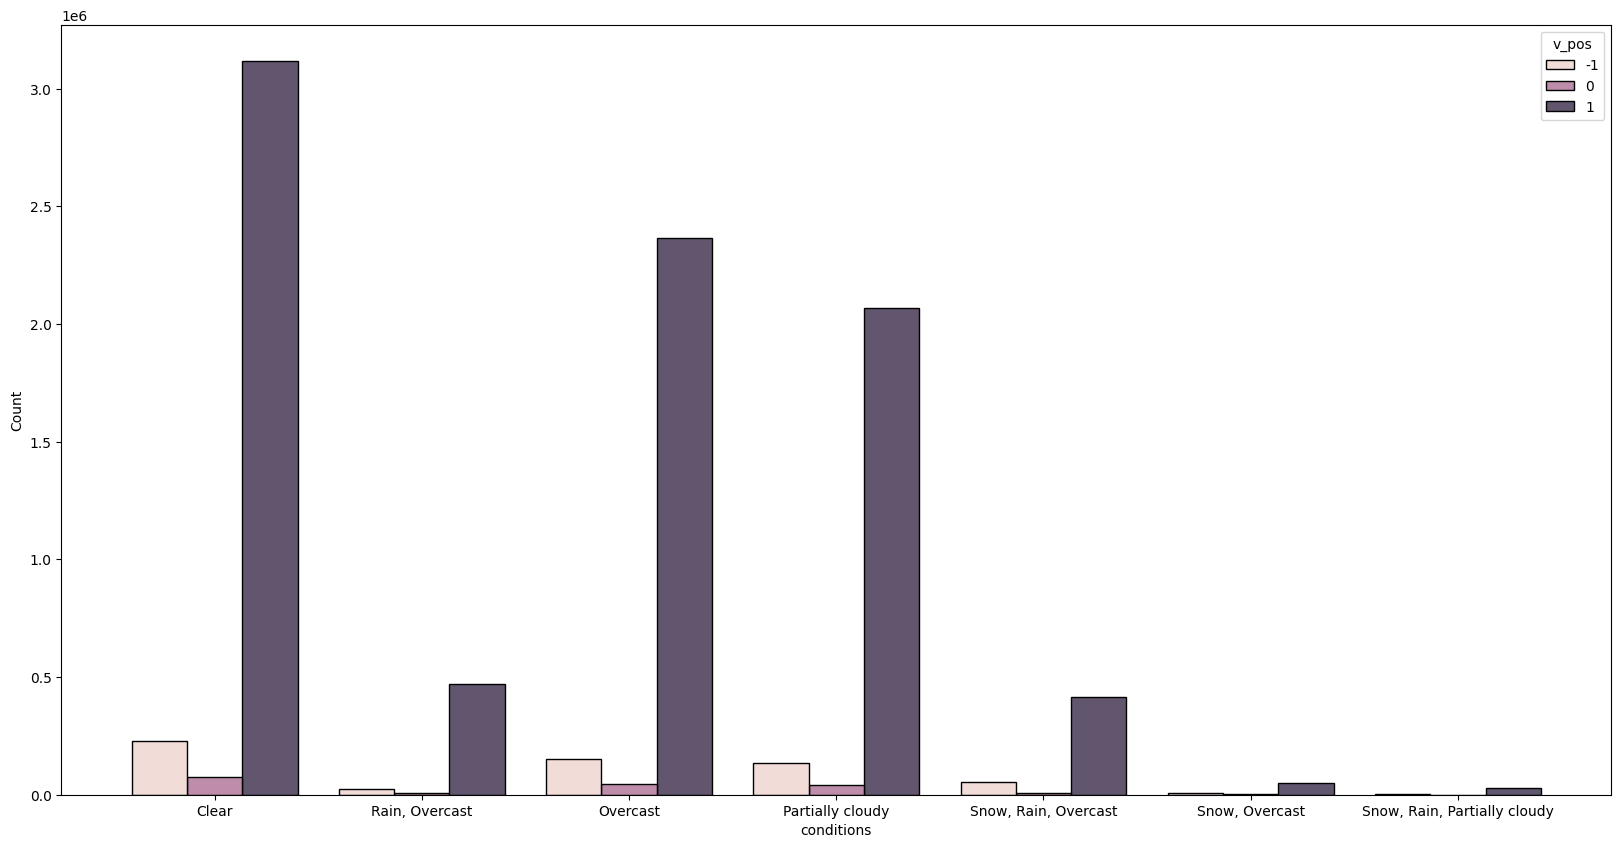

In [6]:
plt.figure(figsize=(20, 10))

sns.histplot(
    data=df,
    x='conditions',
    hue='v_pos',
    discrete=True,
    multiple='dodge',
    shrink=0.8
)

In [8]:
conditions = df.conditions.unique()

for condition in conditions:
    df_temp = df[df.conditions == condition]
    print(condition)
    print(f'     negative: {len(df_temp[df_temp.v_pos == -1]) / len(df_temp):.2%}')
    print(f'          nan: {len(df_temp[df_temp.v_pos == 0]) / len(df_temp):.2%}')
    print(f'  nonnegative: {len(df_temp[df_temp.v_pos == 1]) / len(df_temp):.2%}')


Clear
     negative: 6.70%
          nan: 2.14%
  nonnegative: 91.16%
Rain, Overcast
     negative: 4.65%
          nan: 1.82%
  nonnegative: 93.54%
Overcast
     negative: 5.94%
          nan: 1.82%
  nonnegative: 92.24%
Partially cloudy
     negative: 5.99%
          nan: 1.82%
  nonnegative: 92.19%
Snow, Rain, Overcast
     negative: 11.15%
          nan: 1.82%
  nonnegative: 87.02%
Snow, Overcast
     negative: 12.24%
          nan: 1.82%
  nonnegative: 85.95%
Snow, Rain, Partially cloudy
     negative: 8.51%
          nan: 1.82%
  nonnegative: 89.67%


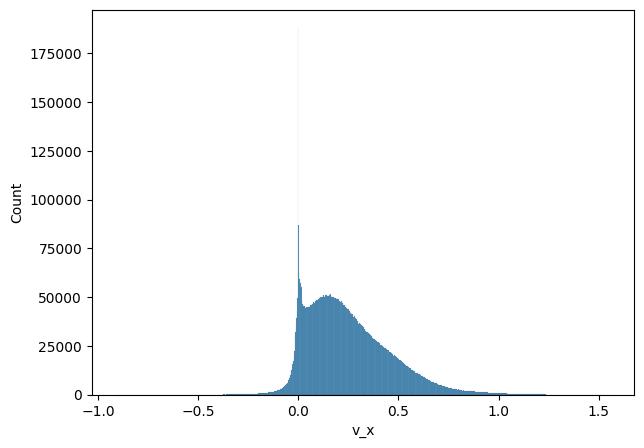

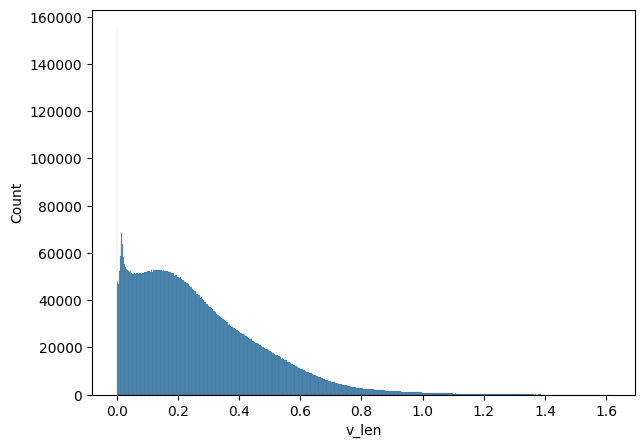

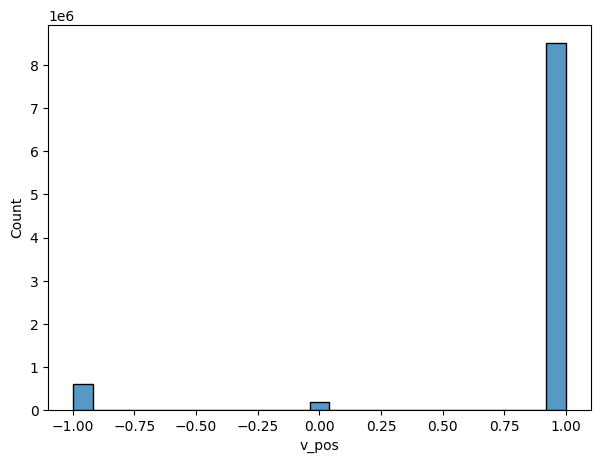

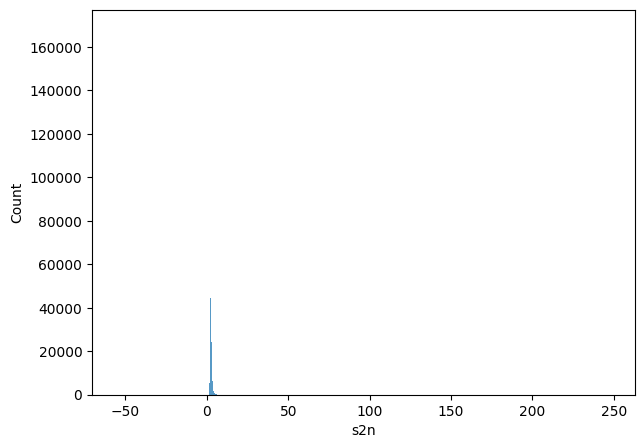

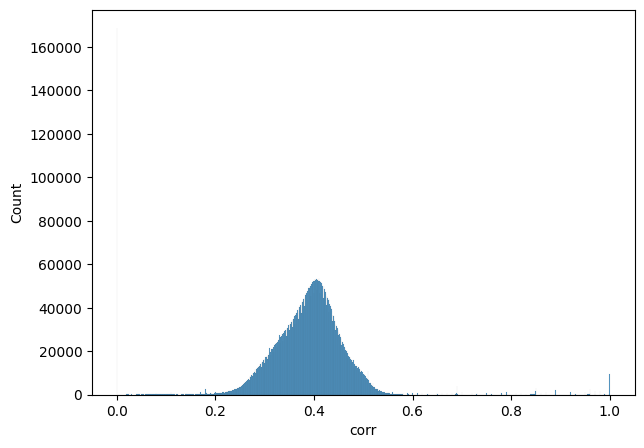

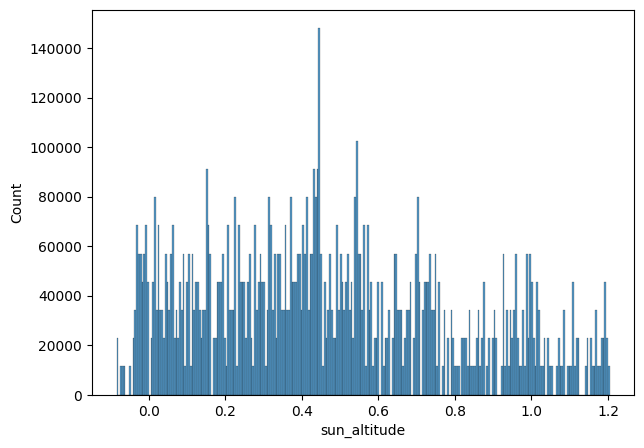

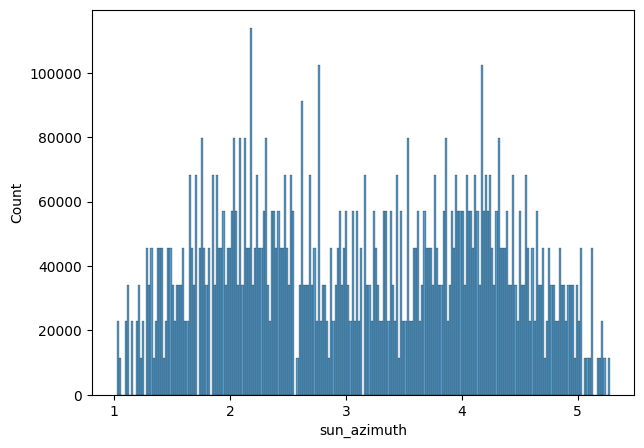

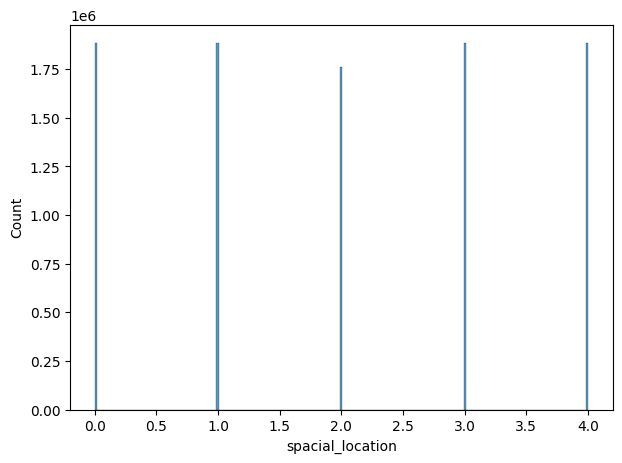

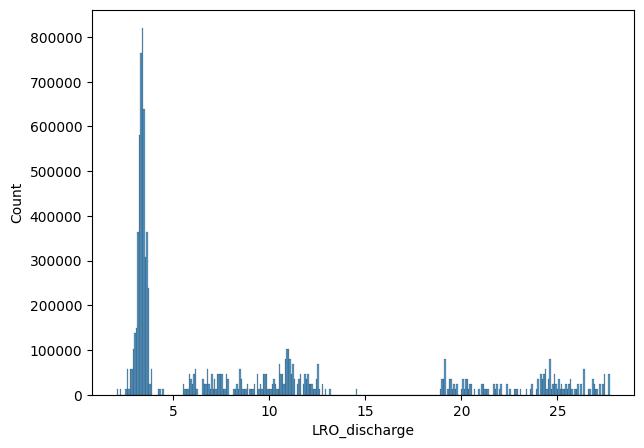

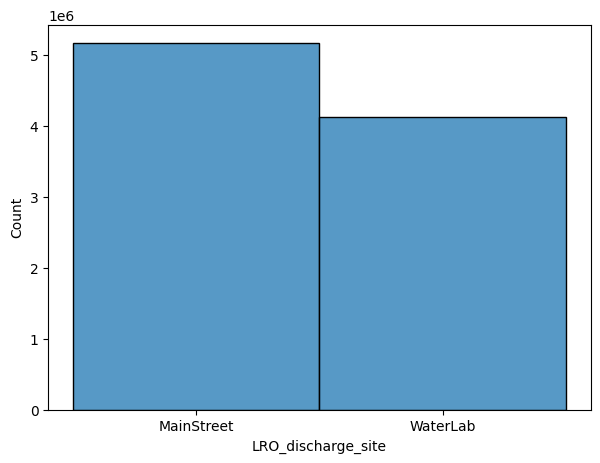

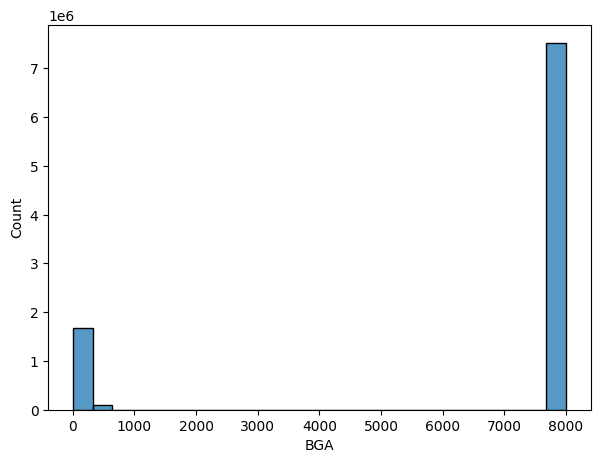

: 

In [9]:
vars = ['v_x', 'v_len', 'v_pos', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
       'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions']

for var in vars:
    plt.figure(figsize=(7, 5))
    sns.histplot(
        data=df,
        x=var
    )
    plt.show()

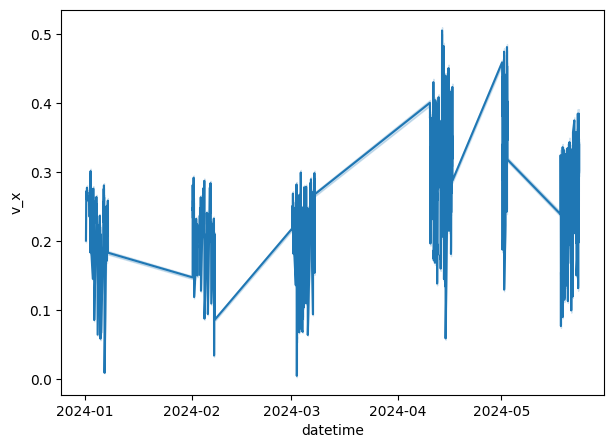

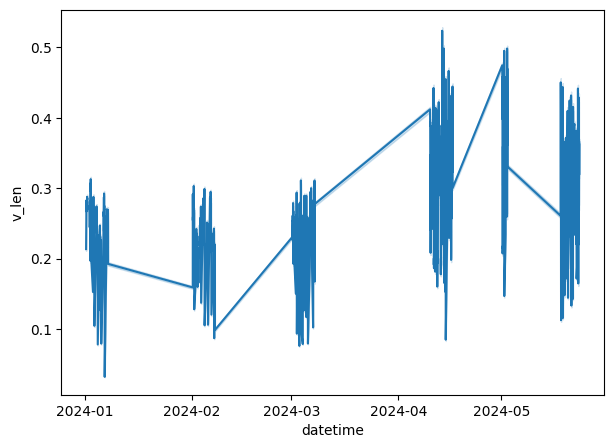

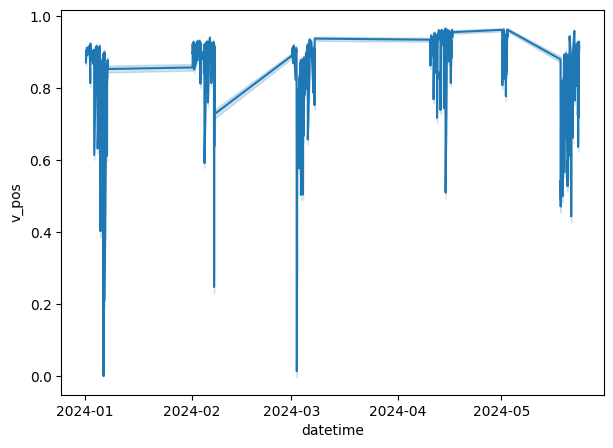

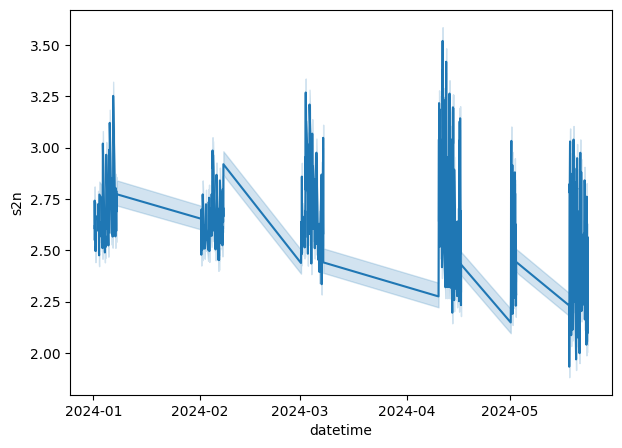

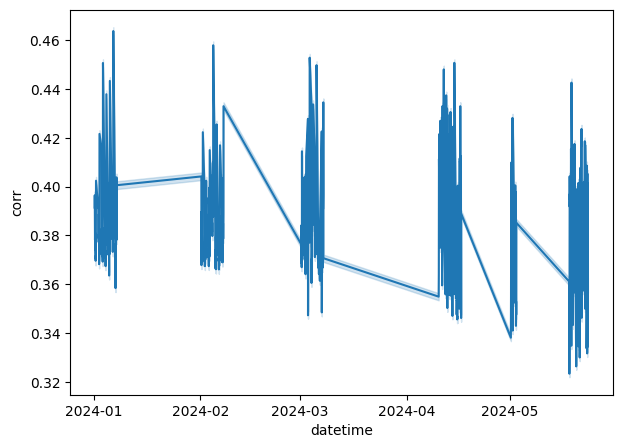

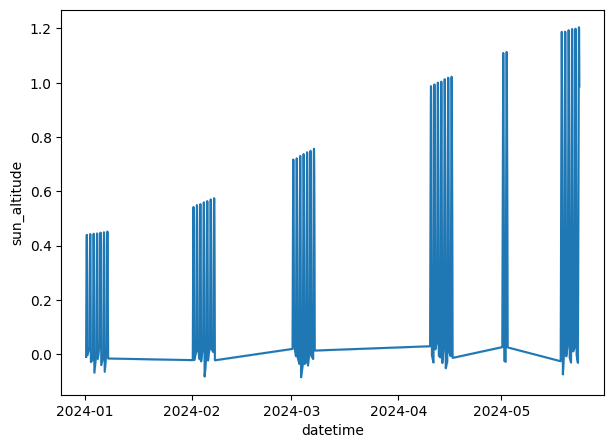

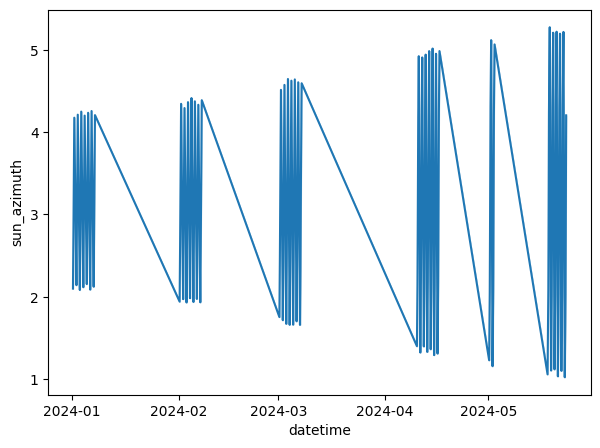

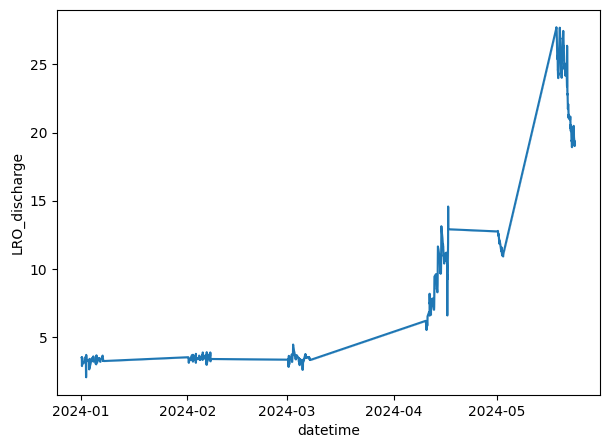

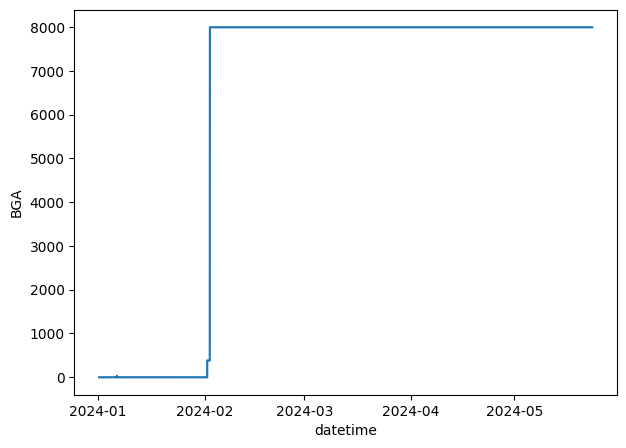

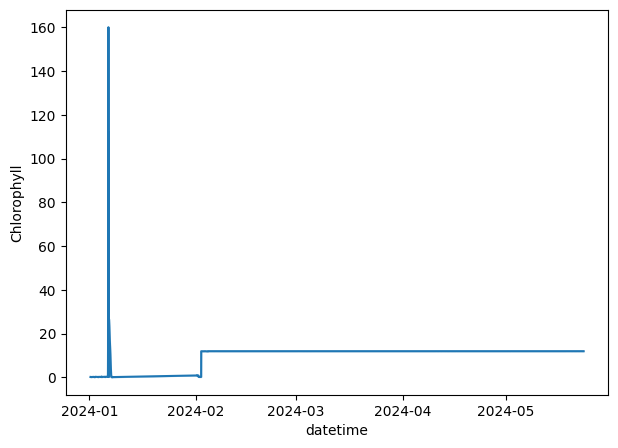

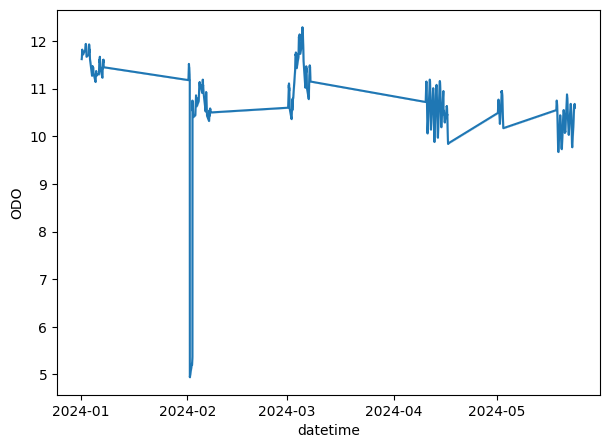

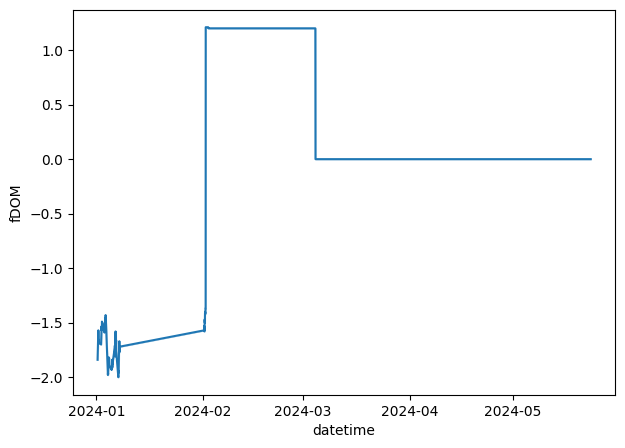

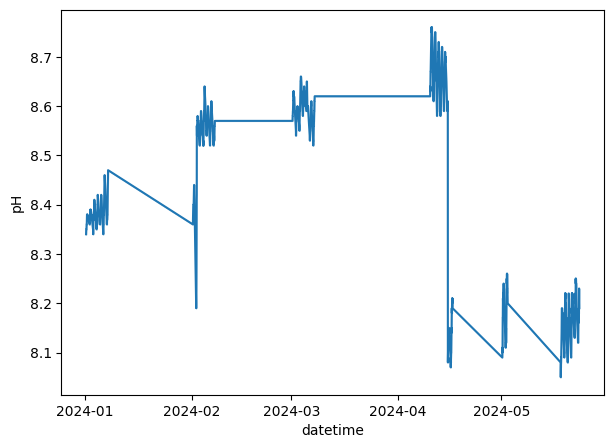

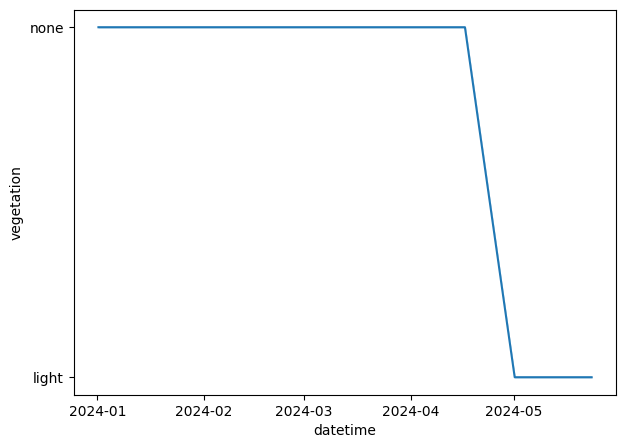

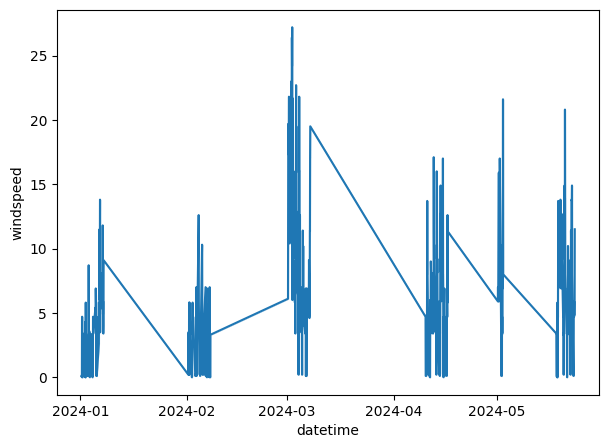

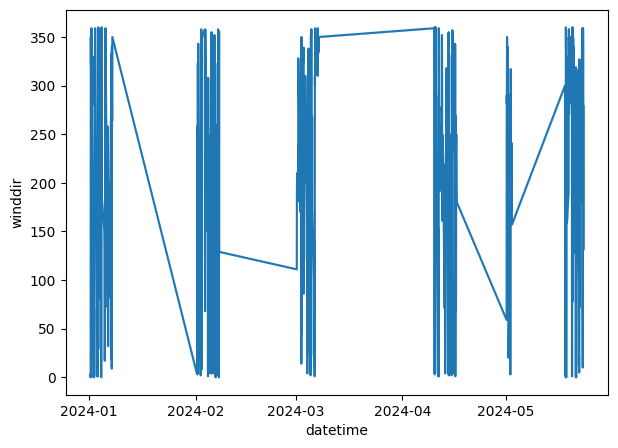

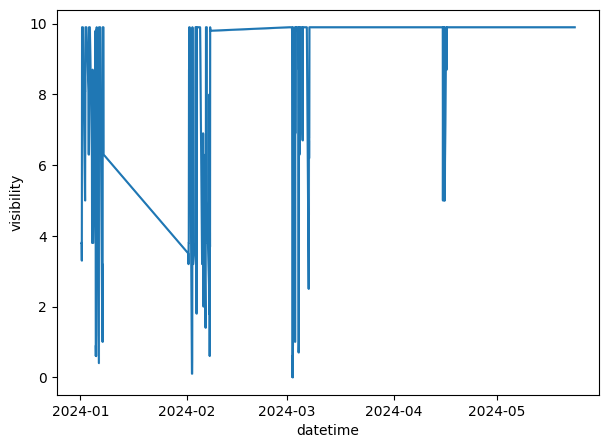

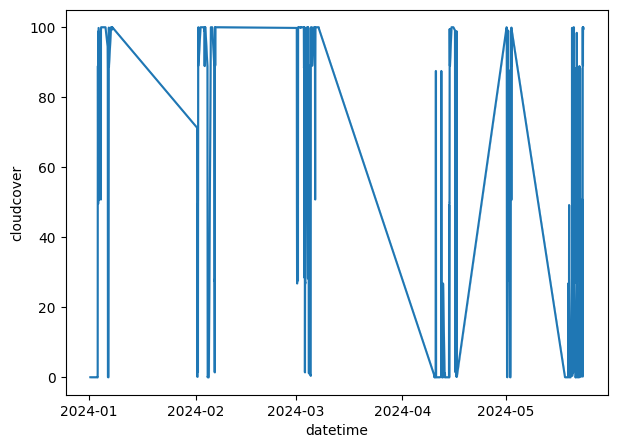

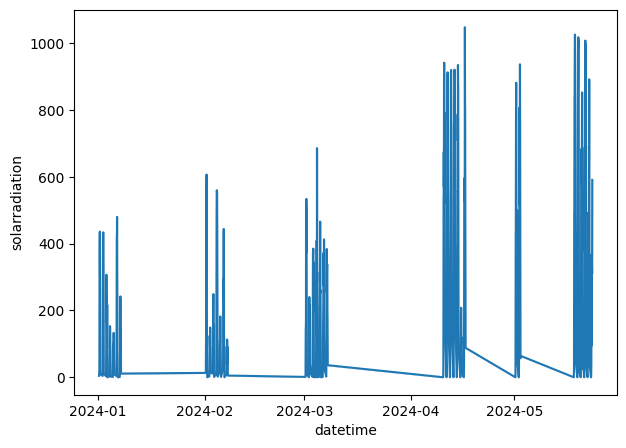

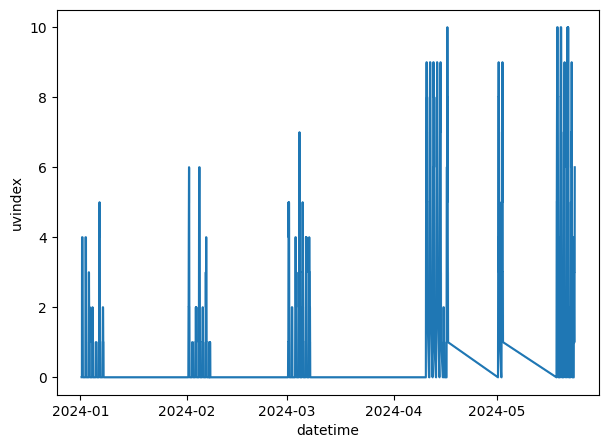

In [4]:
vars = [
    'v_x', 'v_len', 'v_pos', 's2n', 'corr', 'sun_altitude', 'sun_azimuth',
    'LRO_discharge', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
    'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover', 'solarradiation',
    'uvindex'
]

for var in vars:
    plt.figure(figsize=(7, 5))
    sns.lineplot(
        data=df,
        x='datetime',
        y=var
    )
    plt.show()
    plt.close()

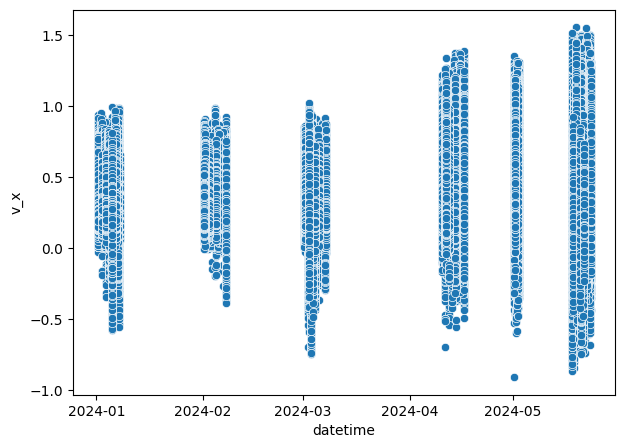

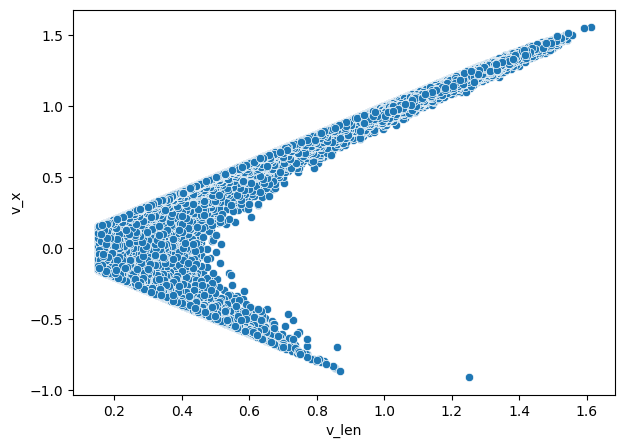

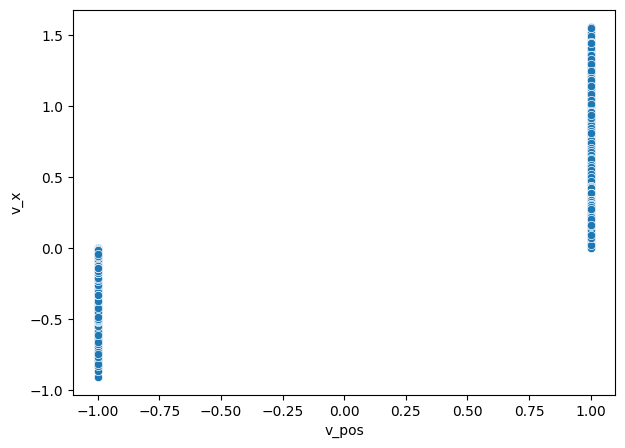

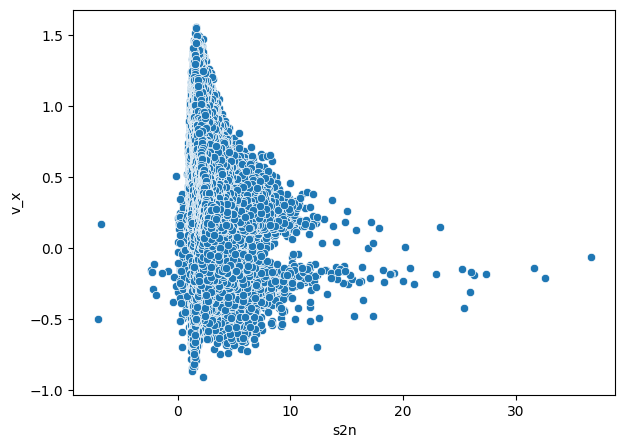

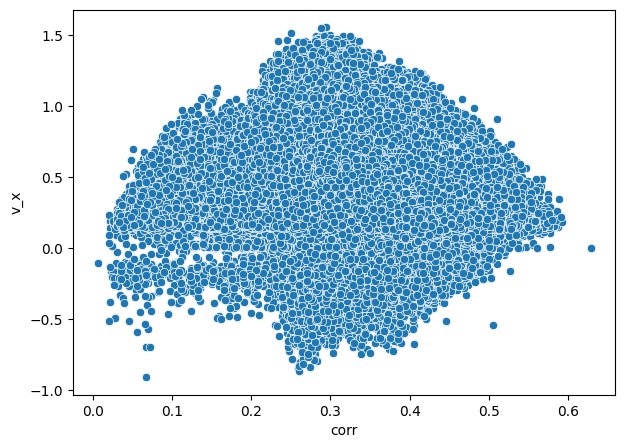

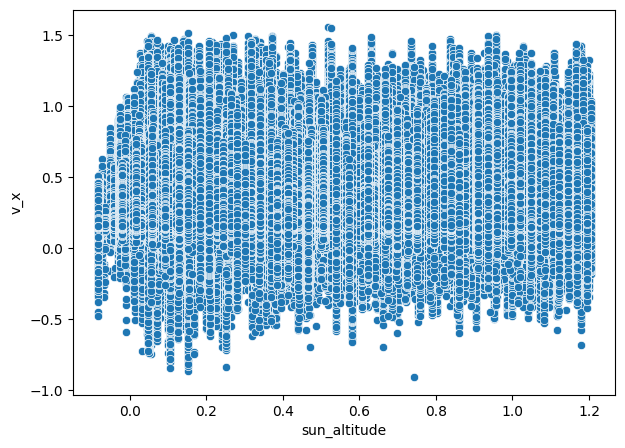

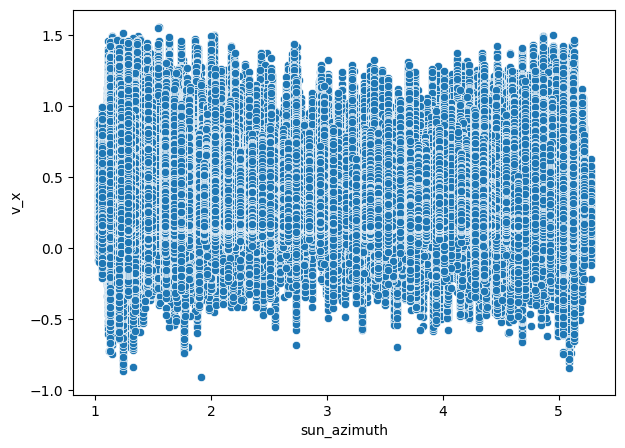

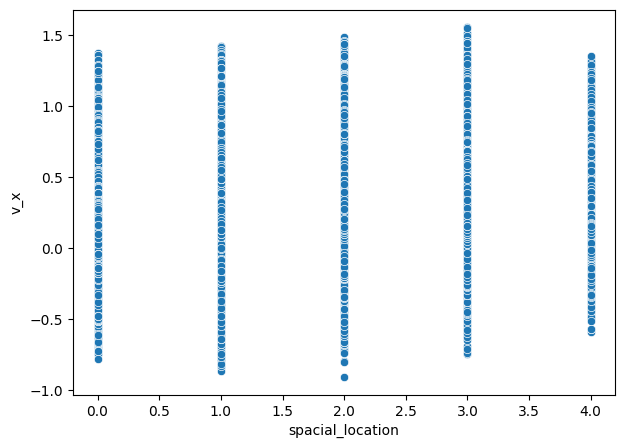

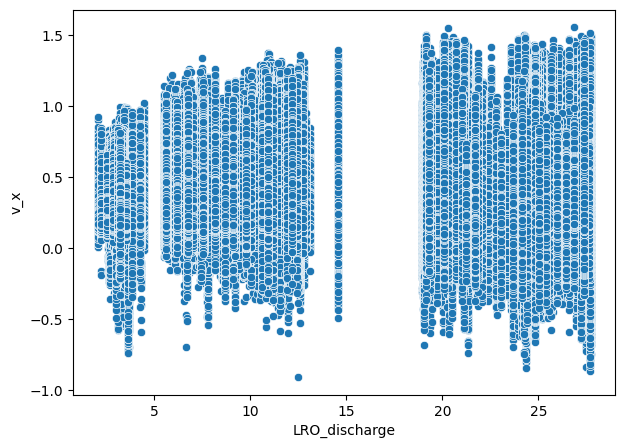

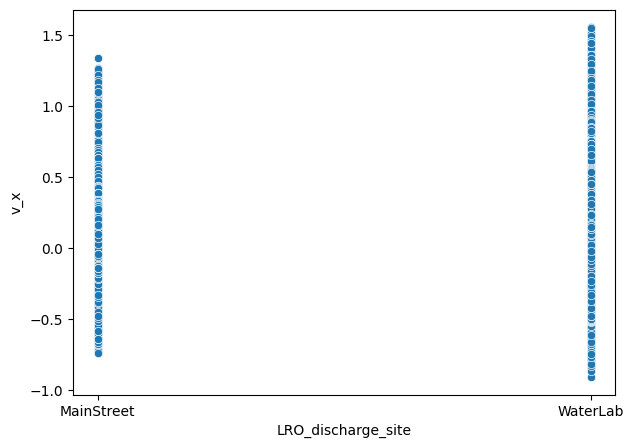

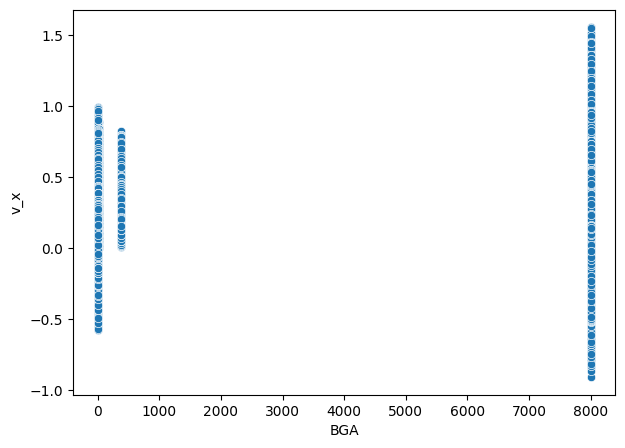

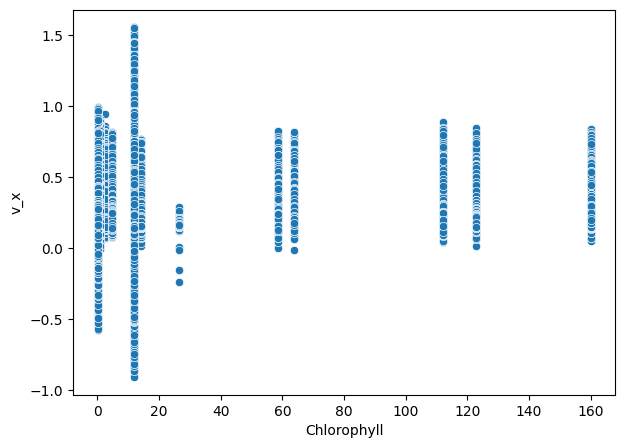

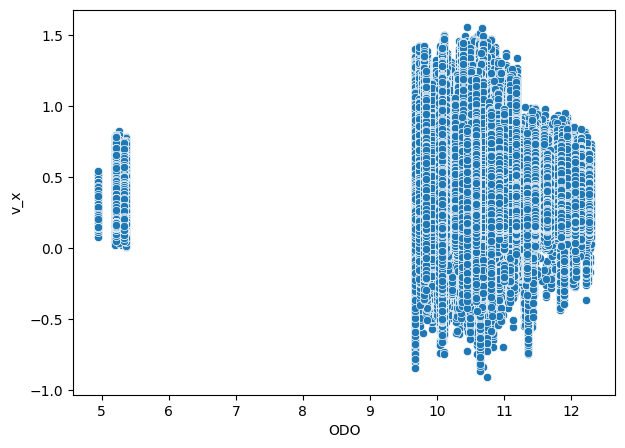

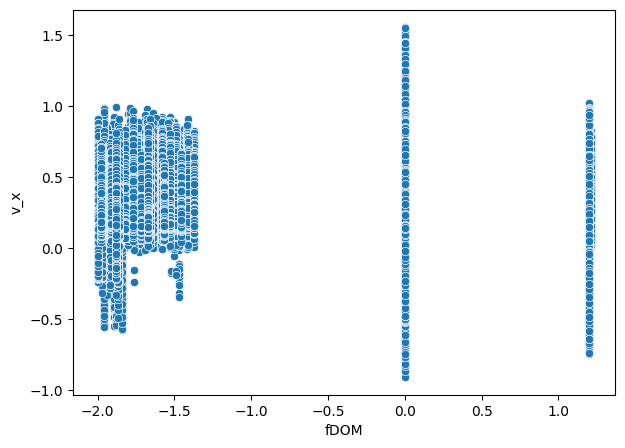

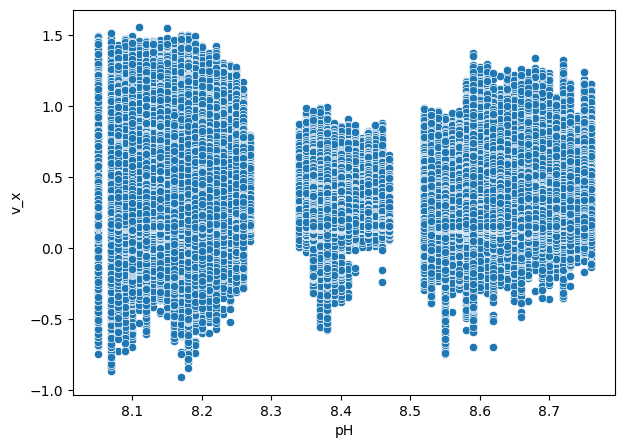

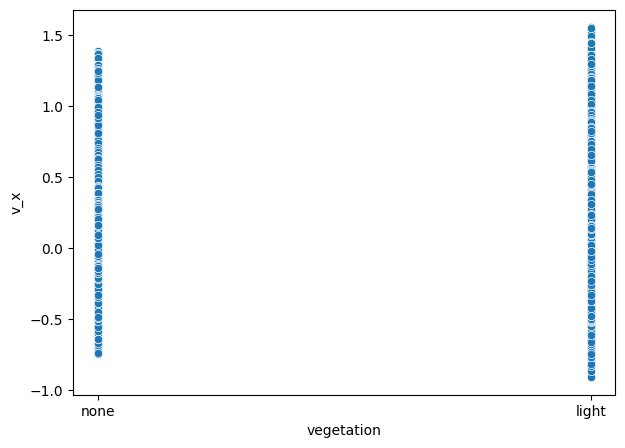

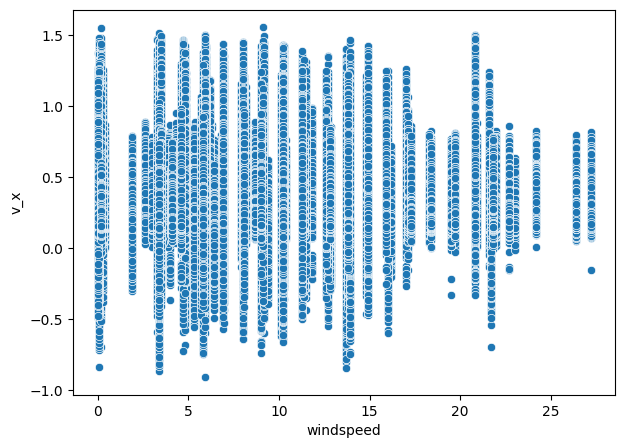

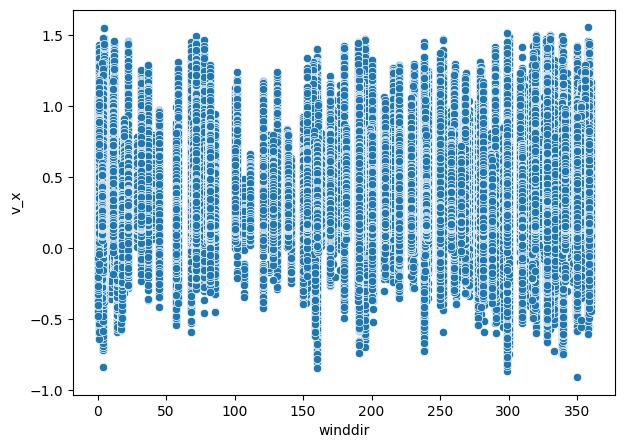

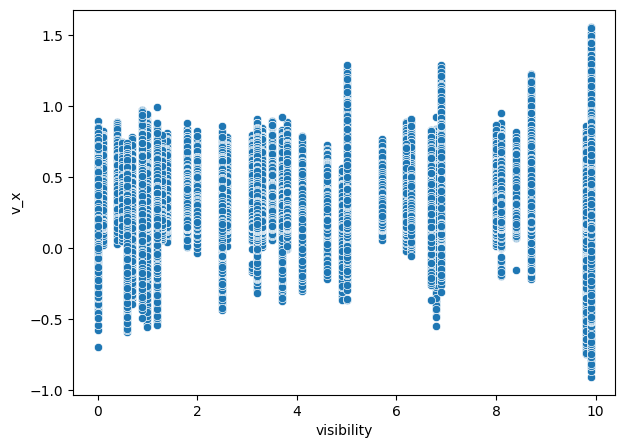

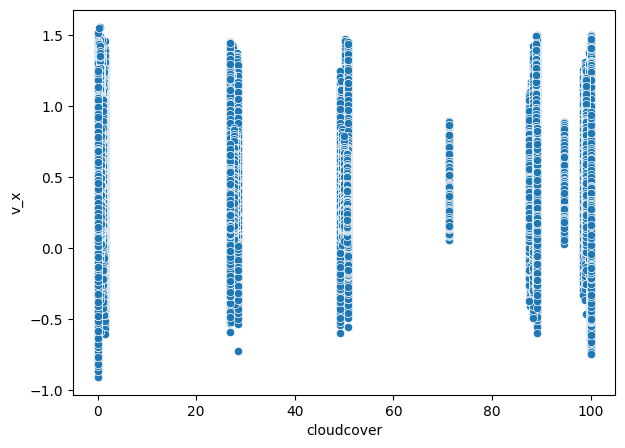

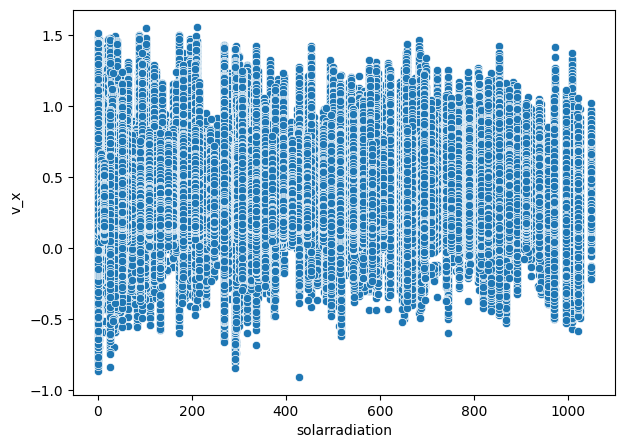

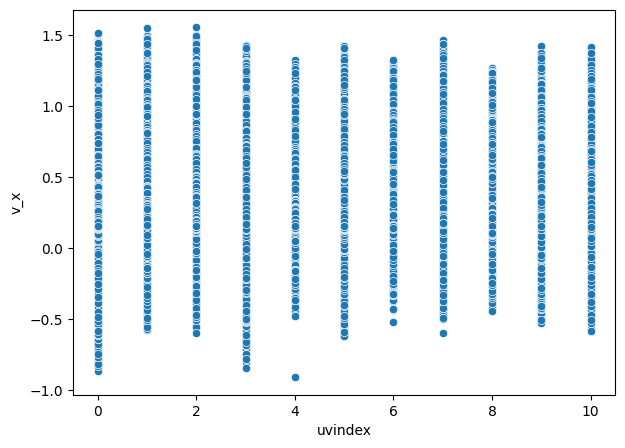

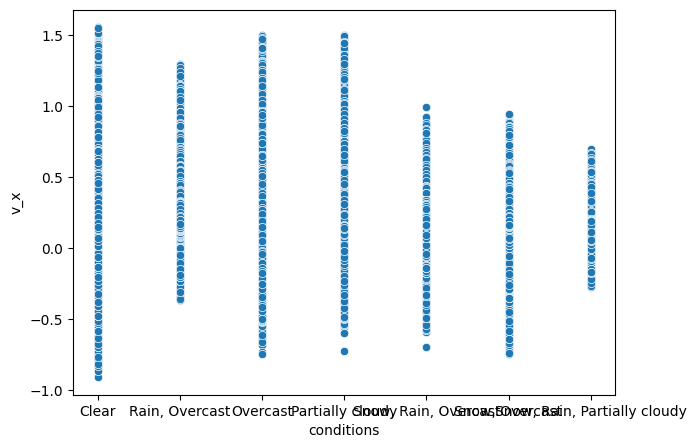

In [5]:
vars = ['datetime', 'v_len', 'v_pos', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
       'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions']

df2 = df[df.v_len >= 0.15]

for var in vars:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df2,
        x=var,
        y='v_x'
    )
    plt.show()
    plt.cla()
    plt.close()

In [6]:
vars = ['datetime', 'v_pos', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
       'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions']

for var in vars:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df,
        x=var,
        y='v_len'
    )
    plt.show()
    plt.cla()
    plt.close()

: 

<Axes: xlabel='solarradiation', ylabel='v_x'>

/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


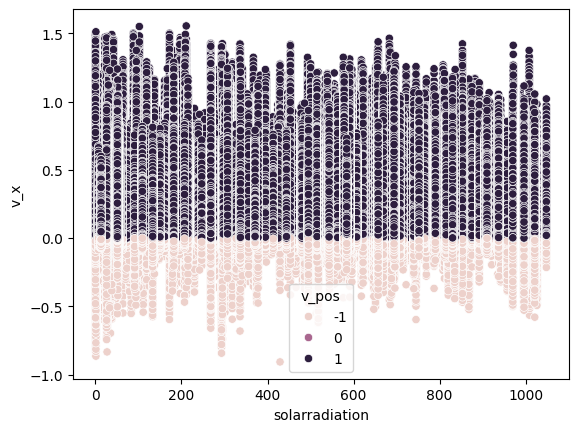

In [7]:
sns.scatterplot(
        data=df,
        x='solarradiation',
        y='v_x',
        hue='v_pos'
    )

<Axes: xlabel='cloudcover', ylabel='v_x'>

/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


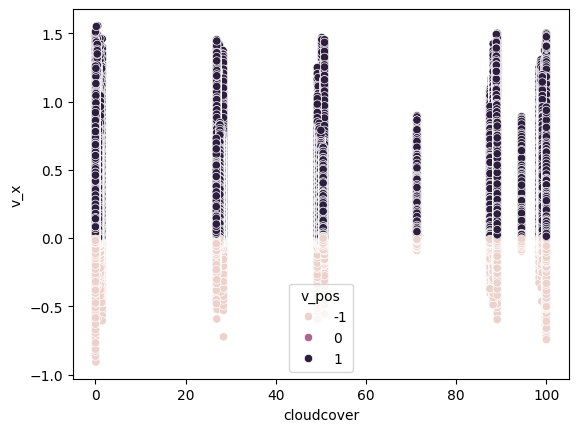

In [8]:
sns.scatterplot(
        data=df,
        x='cloudcover',
        y='v_x',
        hue='v_pos'
    )

<Axes: xlabel='solarradiation', ylabel='cloudcover'>

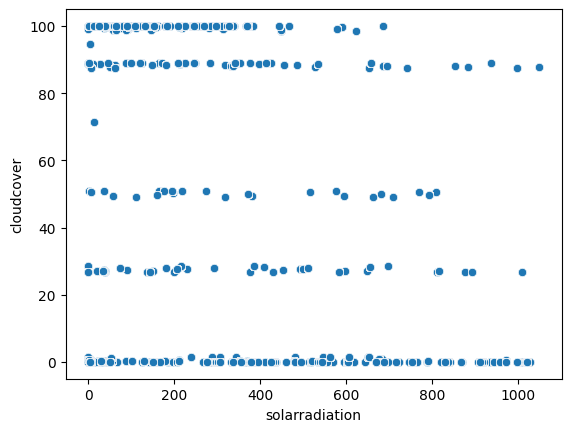

In [4]:
sns.scatterplot(
    data=df,
    x='solarradiation',
    y='cloudcover'
)

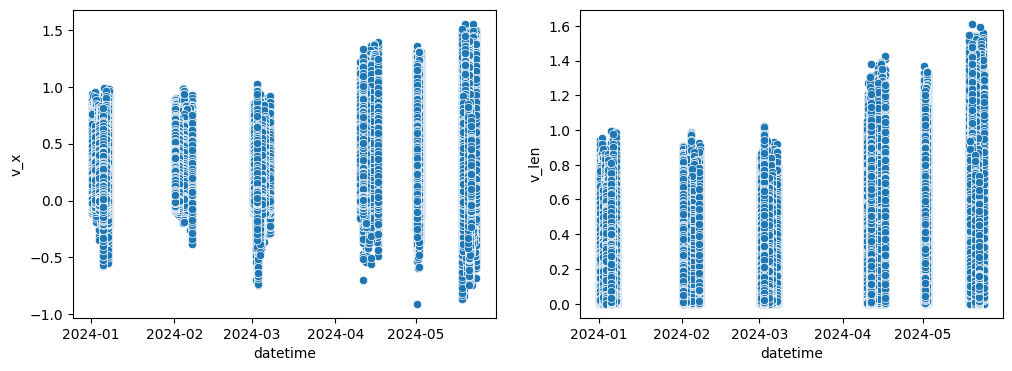

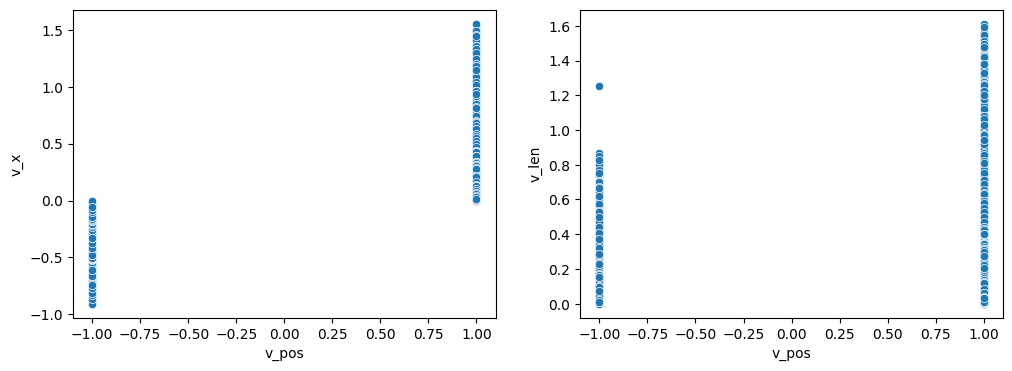

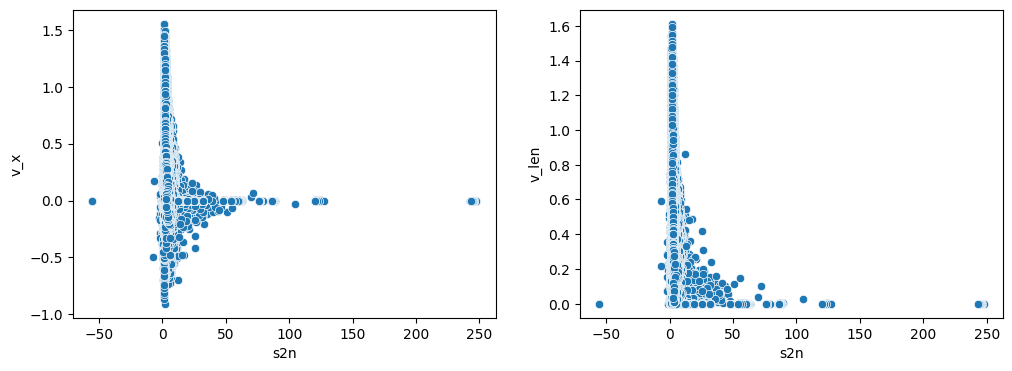

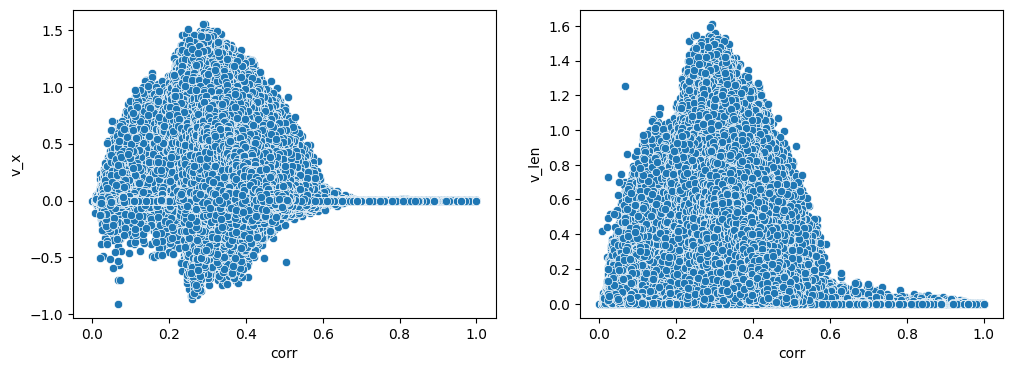

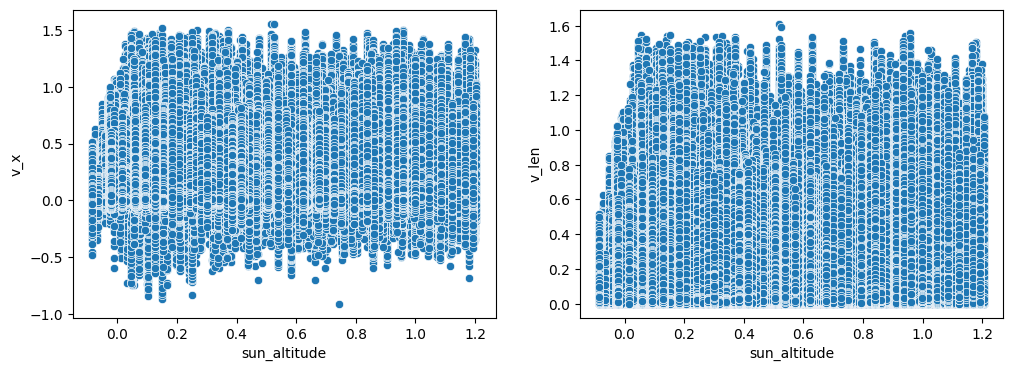

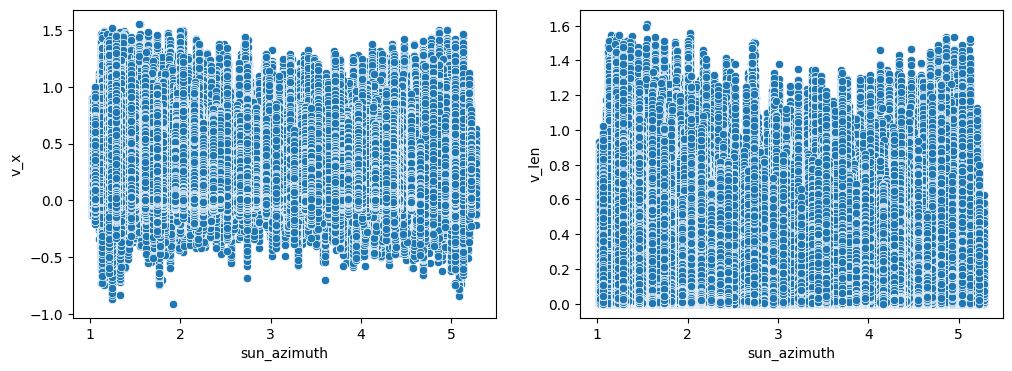

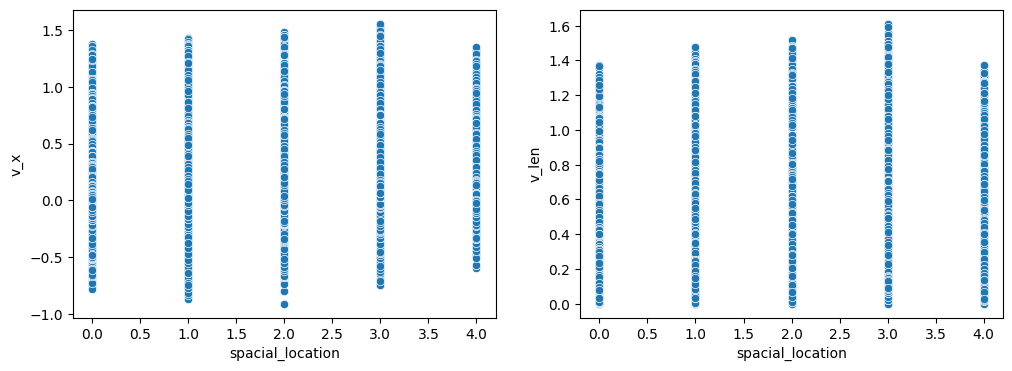

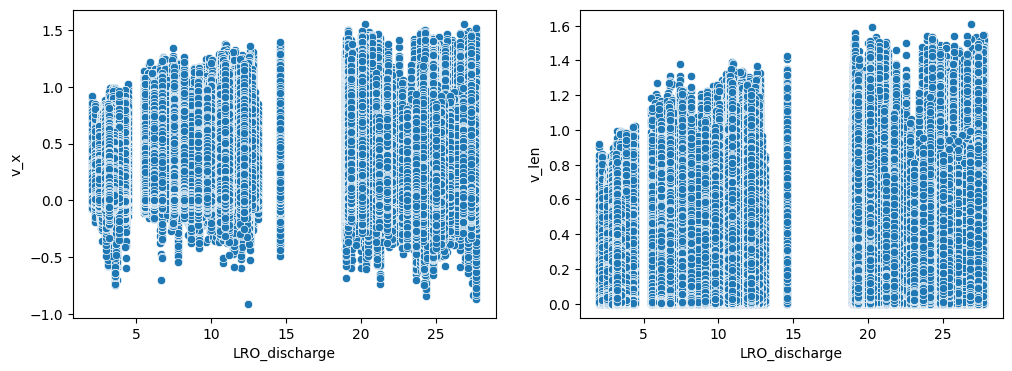

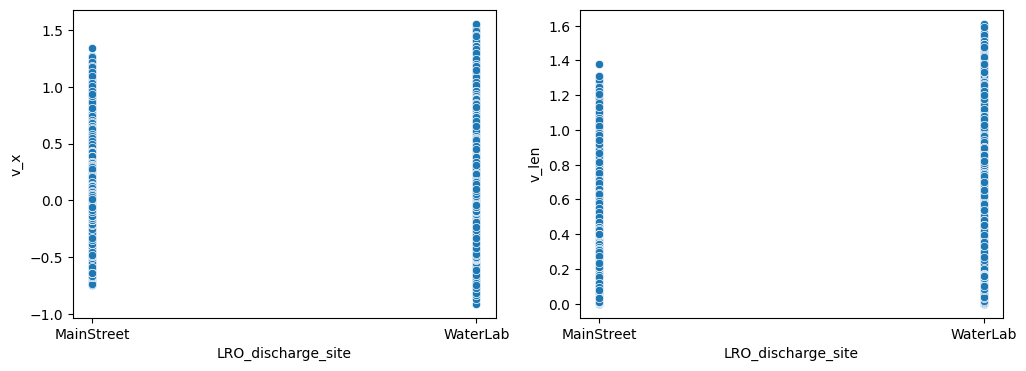

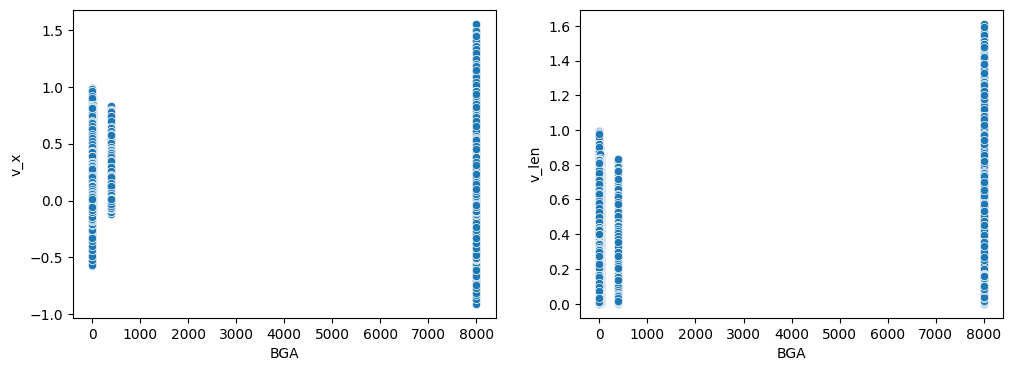

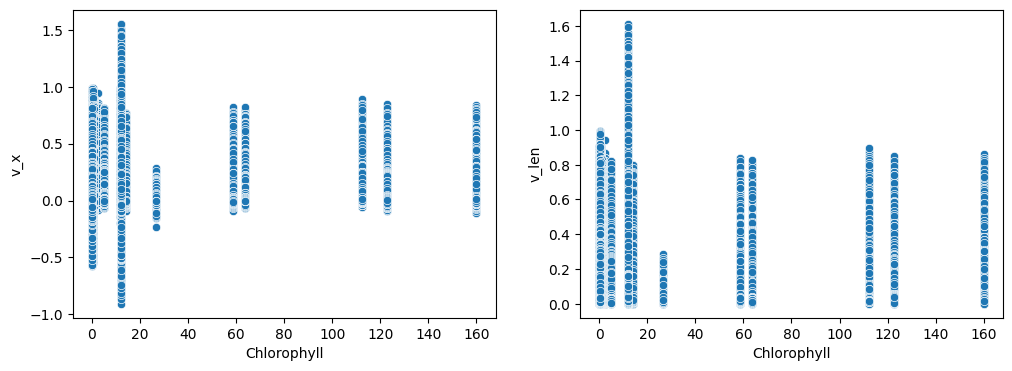

: 

In [5]:
vars = ['datetime', 'v_pos', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
       'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions']

for var in vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.scatterplot(
        data=df,
        x=var,
        y='v_x',
        ax=axes[0]
    )

    sns.scatterplot(
        data=df,
        x=var,
        y='v_len',
        ax=axes[1]
    )

    plt.show()
    plt.cla()
    plt.close()

<Axes: xlabel='datetime', ylabel='Chlorophyll'>

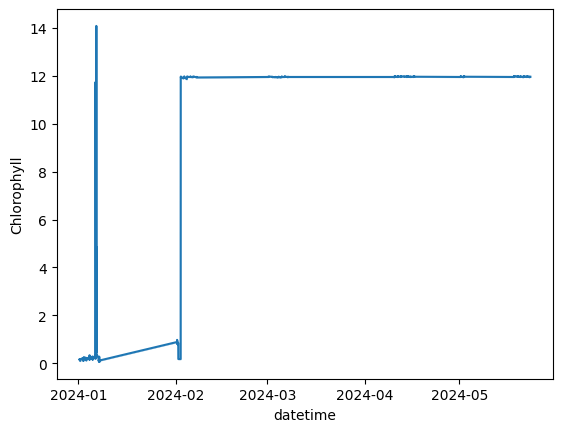

In [4]:
sns.lineplot(
    # data=df,
    data=df[df.Chlorophyll < 25],
    x='datetime',
    y='Chlorophyll'
)

<Axes: xlabel='Chlorophyll', ylabel='Count'>

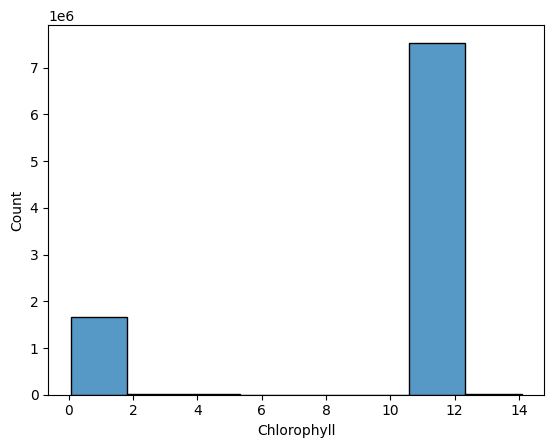

In [5]:
sns.histplot(
    data=df[df.Chlorophyll < 25],
    x='Chlorophyll',
    bins=8
)

In [ ]:
df.columns

In [6]:
df2 = df.groupby('datetime').aggregate({'v_x': 'count'})
df2

v_x
datetime                  
2024-01-01 07:51:43  11189
2024-01-01 08:24:15  11189
2024-01-01 08:56:40  11189
2024-01-01 09:29:06  11189
2024-01-01 10:01:35  11189
...                    ...
2024-05-23 12:19:03  11189
2024-05-23 12:51:20  11189
2024-05-23 13:23:40  11189
2024-05-23 13:56:02  11189
2024-05-23 14:28:18  11189

[816 rows x 1 columns]

In [7]:
df2.v_x.unique()

df2[df2.v_x == 0]

v_x
datetime                
2024-01-06 10:33:49    0